# DS 6021 Final Project: An Analysis of Obesity Levels from Nutrition and Physical Characteristics

Erin Siedlecki, Natalie Seah, Emily Garman, Bela Barton, & Ben Doniger

## Introduction & Dataset Summary

In [1]:
# Add research Qs

## Data Engineering & Preparation

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
# Bela insert code here

In [8]:
df = pd.read_csv('obesity_cleaned.csv')

In [9]:
df['BMI (kg/m2)'] = round(df['Weight'] / (df['Height'] ** 2),2)

In [10]:
df.head(5)

,Gender,Age,Height,Weight,Overweight_Family_History,High_Calorie_Consumption_Often,Vegetable_Consumption_Often,Num_Main_Meals_Daily,Eat_Between_Meals,Smoke_Regularly,Water_Drank_Daily,Calories_Monitored_Daily,Workout_Frequency,Time_Using_Technology_Daily,Alcohol_Consumption_Frequency,Means_of_Transportation,Obesity_Level,BMI (kg/m2)
0,Female,21.0,1.62,64.0,Yes,No,Sometimes,3,Sometimes,No,Between 1 and 2 liters,No,I do not exercise,3-5 hours,Never,Public Transportation,Normal Weight,24.39
1,Female,21.0,1.52,56.0,Yes,No,Always,3,Sometimes,Yes,More than 2 liters,Yes,4 to 5 days a week,0-2 hours,Sometimes,Public Transportation,Normal Weight,24.24
2,Male,23.0,1.80,77.0,Yes,No,Sometimes,3,Sometimes,No,Between 1 and 2 liters,No,3 to 4 days a week,3-5 hours,Frequently,Public Transportation,Normal Weight,23.77
3,Male,27.0,1.80,87.0,No,No,Always,3,Sometimes,No,Between 1 and 2 liters,No,3 to 4 days a week,0-2 hours,Frequently,Walking,Overweight Level I,26.85
4,Male,22.0,1.78,89.8,No,No,Sometimes,1,Sometimes,No,Between 1 and 2 liters,No,I do not exercise,0-2 hours,Sometimes,Public Transportation,Overweight Level II,28.34


In [11]:
df = df.rename(columns={'Height': 'Height (m)', 'Weight': 'Weight (kg)'})
df.head(5)

,Gender,Age,Height (m),Weight (kg),Overweight_Family_History,High_Calorie_Consumption_Often,Vegetable_Consumption_Often,Num_Main_Meals_Daily,Eat_Between_Meals,Smoke_Regularly,Water_Drank_Daily,Calories_Monitored_Daily,Workout_Frequency,Time_Using_Technology_Daily,Alcohol_Consumption_Frequency,Means_of_Transportation,Obesity_Level,BMI (kg/m2)
0,Female,21.0,1.62,64.0,Yes,No,Sometimes,3,Sometimes,No,Between 1 and 2 liters,No,I do not exercise,3-5 hours,Never,Public Transportation,Normal Weight,24.39
1,Female,21.0,1.52,56.0,Yes,No,Always,3,Sometimes,Yes,More than 2 liters,Yes,4 to 5 days a week,0-2 hours,Sometimes,Public Transportation,Normal Weight,24.24
2,Male,23.0,1.80,77.0,Yes,No,Sometimes,3,Sometimes,No,Between 1 and 2 liters,No,3 to 4 days a week,3-5 hours,Frequently,Public Transportation,Normal Weight,23.77
3,Male,27.0,1.80,87.0,No,No,Always,3,Sometimes,No,Between 1 and 2 liters,No,3 to 4 days a week,0-2 hours,Frequently,Walking,Overweight Level I,26.85
4,Male,22.0,1.78,89.8,No,No,Sometimes,1,Sometimes,No,Between 1 and 2 liters,No,I do not exercise,0-2 hours,Sometimes,Public Transportation,Overweight Level II,28.34


## Visualization & Exploratory Data Analysis

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height (m)                      2111 non-null   float64
 3   Weight (kg)                     2111 non-null   float64
 4   Overweight_Family_History       2111 non-null   object 
 5   High_Calorie_Consumption_Often  2111 non-null   object 
 6   Vegetable_Consumption_Often     2111 non-null   object 
 7   Num_Main_Meals_Daily            2111 non-null   int64  
 8   Eat_Between_Meals               2111 non-null   object 
 9   Smoke_Regularly                 2111 non-null   object 
 10  Water_Drank_Daily               2111 non-null   object 
 11  Calories_Monitored_Daily        2111 non-null   object 
 12  Workout_Frequency               21

In [17]:
numeric = df[['Age', 'Height (m)', 'Weight (kg)', 'Num_Main_Meals_Daily', 'BMI (kg/m2)']]
num_corr = numeric.corr()
num_corr

,Age,Height (m),Weight (kg),Num_Main_Meals_Daily,BMI (kg/m2)
Age,1.000000,-0.025958,0.202560,-0.043367,0.244149
Height (m),-0.025958,1.000000,0.463136,0.244055,0.131788
Weight (kg),0.202560,0.463136,1.000000,0.103273,0.934807
Num_Main_Meals_Daily,-0.043367,0.244055,0.103273,1.000000,0.033819
BMI (kg/m2),0.244149,0.131788,0.934807,0.033819,1.000000


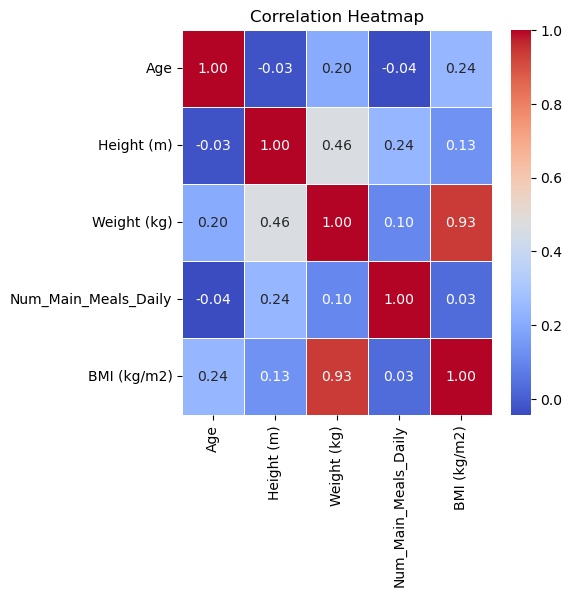

In [54]:
plt.figure(figsize=(5, 5))
sns.heatmap(num_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

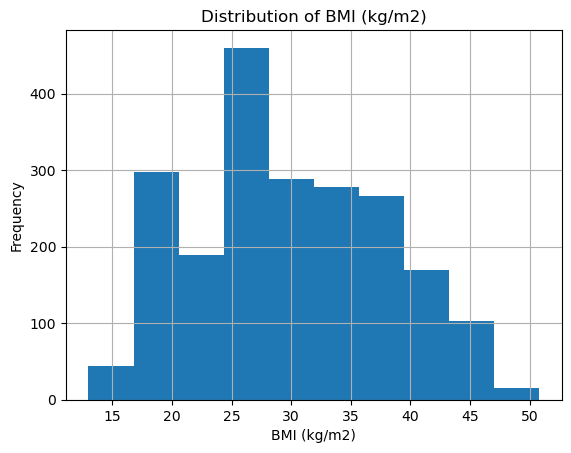

In [23]:
df['BMI (kg/m2)'].hist()
plt.title('Distribution of BMI (kg/m2)')
plt.xlabel('BMI (kg/m2)')
plt.ylabel('Frequency')
plt.show()

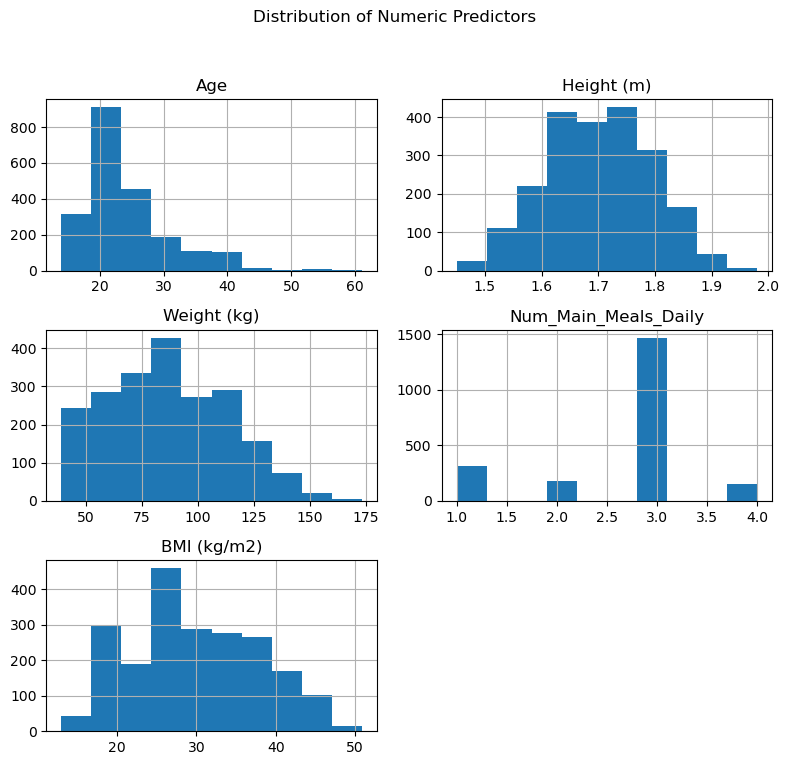

In [30]:
numeric.hist(figsize=(8,8))
plt.suptitle('Distribution of Numeric Predictors')
plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

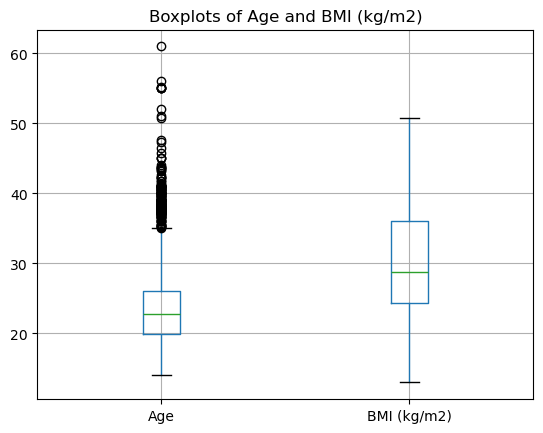

In [39]:
df[['Age', 'BMI (kg/m2)']].boxplot()
plt.title('Boxplots of Age and BMI (kg/m2)')
plt.show()

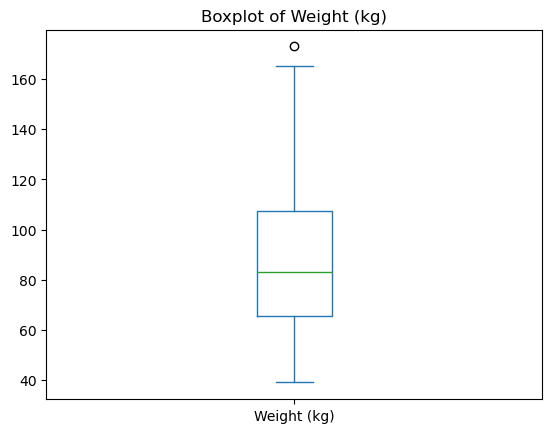

In [38]:
df['Weight (kg)'].plot.box()
plt.title('Boxplot of Weight (kg)')
plt.show()

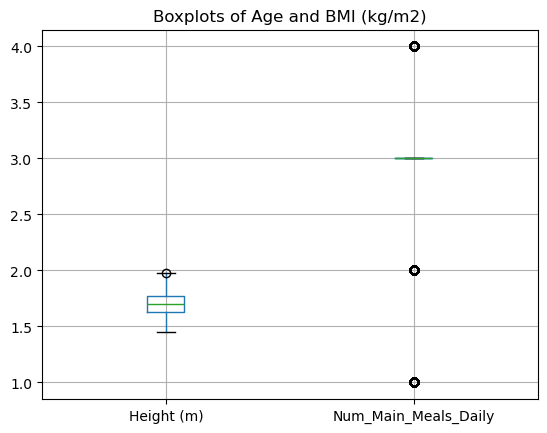

In [40]:
df[['Height (m)', 'Num_Main_Meals_Daily']].boxplot()
plt.title('Boxplots of Age and BMI (kg/m2)')
plt.show()

In [52]:
df.describe()

,Age,Height (m),Weight (kg),Num_Main_Meals_Daily,BMI (kg/m2)
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.687826,29.700137
std,6.345968,0.093305,26.191172,0.809680,8.011354
min,14.000000,1.450000,39.000000,1.000000,13.000000
25%,19.947192,1.630000,65.473343,3.000000,24.325000
50%,22.777890,1.700499,83.000000,3.000000,28.720000
75%,26.000000,1.768464,107.430682,3.000000,36.015000
max,61.000000,1.980000,173.000000,4.000000,50.810000


In [53]:
df.describe(include='all')

,Gender,Age,Height (m),Weight (kg),Overweight_Family_History,High_Calorie_Consumption_Often,Vegetable_Consumption_Often,Num_Main_Meals_Daily,Eat_Between_Meals,Smoke_Regularly,Water_Drank_Daily,Calories_Monitored_Daily,Workout_Frequency,Time_Using_Technology_Daily,Alcohol_Consumption_Frequency,Means_of_Transportation,Obesity_Level,BMI (kg/m2)
count,2111,2111.000000,2111.000000,2111.000000,2111,2111,2111,2111.000000,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111.000000
unique,2,NaN,NaN,NaN,2,2,3,NaN,4,2,3,2,4,3,4,5,7,NaN
top,Male,NaN,NaN,NaN,Yes,Yes,Sometimes,NaN,Sometimes,No,Between 1 and 2 liters,No,1 or 2 days a week,0-2 hours,Sometimes,Public Transportation,Obesity Type I,NaN
freq,1068,NaN,NaN,NaN,1726,1866,1013,NaN,1765,2067,1110,2015,776,952,1401,1580,351,NaN
mean,NaN,24.312600,1.701677,86.586058,NaN,NaN,NaN,2.687826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.700137
std,NaN,6.345968,0.093305,26.191172,NaN,NaN,NaN,0.809680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.011354
min,NaN,14.000000,1.450000,39.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.000000
25%,NaN,19.947192,1.630000,65.473343,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.325000
50%,NaN,22.777890,1.700499,83.000000,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.720000
75%,NaN,26.000000,1.768464,107.430682,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.015000


In [64]:
categorical = df.select_dtypes(include='object').columns

for col in categorical:
    print(df[col].value_counts())
    print('-' * 30)

Gender
Male      1068
Female    1043
Name: count, dtype: int64
------------------------------
Overweight_Family_History
Yes    1726
No      385
Name: count, dtype: int64
------------------------------
High_Calorie_Consumption_Often
Yes    1866
No      245
Name: count, dtype: int64
------------------------------
Vegetable_Consumption_Often
Sometimes    1013
Always        996
Never         102
Name: count, dtype: int64
------------------------------
Eat_Between_Meals
Sometimes     1765
Frequently     242
Always          53
Never           51
Name: count, dtype: int64
------------------------------
Smoke_Regularly
No     2067
Yes      44
Name: count, dtype: int64
------------------------------
Water_Drank_Daily
Between 1 and 2 liters    1110
More than 2 liters         516
Less than a liter          485
Name: count, dtype: int64
------------------------------
Calories_Monitored_Daily
No     2015
Yes      96
Name: count, dtype: int64
------------------------------
Workout_Frequency
1 or 2 d